<a href="https://colab.research.google.com/github/pncd789/Restaurant-classifier/blob/main/Zomato_restaurant_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


This dataset contains restaurants registered in the Zomato website and found in Bengaluru, India which is the IT capital of India. There are a lot of factors that go into starting a restaurant and with plenty of competition, it has become even harder than ever to create a successful one. With high capital commitment, it is important to be able to gauge whether or not your restaurant will be considered as good or not by the customers. The goal of this is to: 
* Explore the data 
* Clean up any missing values
* Visualize the data in order to find relationships for feature creation
* Create new features
* Create a model that will predict whether a restaurant will be considered good or not.

# 1 Import Libraries

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

### Column description

url - url of the restaurants

address - address of the restaurant in Bengaluru

name - name of the restaurant

online_order - whether online ordering is available in the restaurant or not

book_table - whether table book option available or not

rate - rating of the restaurant out of 5

votes - total number of rating for the restaurant

phone - phone number of the restaurant

location - neighborhood in which the restaurant is located

rest_type - restaurant type

dish_liked - dishes people liked in the restaurant

cuisines - food styles, separated by comma

approx_cost(for two people) - contains the approximate cost for meal for two people

reviews_list - list of tuples containing reviews for the restaurant, each tuple

menu_item - list of menus available in the restaurant

listed_in(type) - type of meal

listed_in(city) - contains the neighborhood in which the restaurant is listed

In [ ]:
df=pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")

#### Brief overview of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.shape

(51717, 17)

In [ ]:
df.head(6)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari


# Data Exploration and Cleaning
Initially we see here that the type of some columns are objects when they should be numeric like rate and approx_cost(for two people). There are also clearly some null values present. I am going to:
* convert the datatype of those columns to a float and then check for how many values are present in each column. 
* I'll also be renaming some columns to something that is easier to use when working with the dataset.

In [ ]:
#the rate column is over 5, which means we first have to parse out the /5 part of each row
df['rate'] = df['rate'].str.split('/', expand = True)[0]

# upon further inspection, the data cannot immediately be converted to a float because there are some entries with values 'NEW' and '-'
#I am going to convert those to null values first
df['rate'] = df['rate'].str.replace('NEW', str(np.nan))
df['rate'] = df['rate'].str.replace('-', str(np.nan))
df['rate'] = df['rate'].astype(float)
#df['rate'] = df['rate'].str.apply(lambda x: x.replace('-', str(np.nan)))

In [ ]:
#convert approx_cost(for two people) to float and rename it to make it easier to use
df.rename(columns={'approx_cost(for two people)':'cost_for_two'}, inplace = True)

#some values have commas so we'll have to remove those first
df.cost_for_two = df.cost_for_two.str.replace(',', '', True)
df.cost_for_two = df.cost_for_two.astype(float)

In [ ]:
# Rename some columns to make it easier to work with
df.rename(columns={'listed_in(type)':'list_type', 'listed_in(city)':'list_city'}, inplace = True)

Now that we have transformed these columns we can now move on to identifying the null values.

In [ ]:
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate            10052
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost_for_two      346
reviews_list        0
menu_item           0
list_type           0
list_city           0
dtype: int64

We can see a large amount of nuull values in rate and dish_liked. There are a few potential reasons for this. Maybe the restaurant is new and has not received ratings yet or maybe some of the customers skipped over it when reviewing the restaurant. For dish_liked, it is possible that the reviewer did not like any of the dishes, maybe he/she could not choose one or maybe the restaurant has not been reviewed yet. 

* For dishes liked, more than half of the rows are null, so I'm just going to drop the column, since the column itself also probably won't have a great effect on the dataset anyway.
* For rate, we can see in the reviews_list that every review starts with a rating, so we are just going to extract that. For those without any reviews, we can just drop them.
* The other null values are smaller in number and I will deal with each of them separately.

In [ ]:
# Dropped the dish_liked column
df.drop(axis=1, columns='dish_liked', inplace = True)

In [ ]:
# Checked which rows have null locations to find a relationshp and figure out how to impute the null value
df[df.location.isnull()==True]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost_for_two,reviews_list,menu_item,list_type,list_city
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
9874,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,BTM
13693,https://www.zomato.com/bangalore/mohabbat-desi...,"Chandapura- Anakal Main Road, Oppsite Vemana H...",Mohabbat Desi Restaurant,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Electronic City
16351,https://www.zomato.com/bangalore/desi-chatkara...,"Kudlu Gate, Bommanahalli, Bangalore",Desi Chatkara,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,HSR
26432,https://www.zomato.com/bangalore/new-taj-birya...,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Kammanahalli
26519,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 4th Block
27672,https://www.zomato.com/bangalore/manchow-koram...,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Koramangala 4th Block
28611,https://www.zomato.com/bangalore/manchow-koram...,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Koramangala 4th Block
29298,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 5th Block
30604,https://www.zomato.com/bangalore/manchow-koram...,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Koramangala 5th Block


It looks like all the values without a location have nulls in the other columns too, so let's just drop those rows.

In [ ]:
# Drop rows with null values in location
df.dropna(subset=['location'], inplace=True)

I couldn't really figure out a way to properly impute the null values in rest_type so I just dropped those rows

In [ ]:
# Drop rows with null values in rest_type
df.dropna(subset=['rest_type'], inplace=True)

The phone number has a lot of nulls, but it also shouldn't have a siginificant impact on the model, so I'm jut going to drop the whole column

In [ ]:
# Drop the phone column
df.drop(columns='phone',inplace=True)

Under menu and reviews, those with empty reviews or menu have the [] symbol, so I am just going to convert them into null values

In [ ]:
#convert the [] into null values
df['reviews_list'] = df['reviews_list'].apply(lambda x: np.nan if len(str(x))==2 else x)
df['menu_item'] = df['menu_item'].apply(lambda x: np.nan if len(str(x))==2 else x)

In [ ]:
#check the dataframe of values where both the rate and reviews_list columns are null
df[(df.rate.isnull()==True)&(df.reviews_list.isnull()==True)]

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,menu_item,list_type,list_city
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500.0,NaN,NaN,Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400.0,NaN,NaN,Delivery,Banashankari
92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,South Indian,200.0,NaN,NaN,Delivery,Banashankari
107,https://www.zomato.com/bangalore/coffee-shopee...,"1722, 13th Main Road 31st Cross BSK, 2nd Stage...",Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",Beverages,250.0,NaN,NaN,Delivery,Banashankari
113,https://www.zomato.com/bangalore/dharwad-line-...,"Shop 25, 1st Cross, 50 Feet Main Road, Near BD...",Dharwad Line Bazaar Mishra Pedha,No,No,NaN,0,Banashankari,Dessert Parlor,Mithai,150.0,NaN,NaN,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,Brookefield,Quick Bites,South Indian,200.0,NaN,NaN,Dine-out,Whitefield
51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,Brookefield,Quick Bites,"Biryani, Kebab",300.0,NaN,NaN,Dine-out,Whitefield
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,North Indian,400.0,NaN,NaN,Dine-out,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600.0,NaN,NaN,Pubs and bars,Whitefield


In [ ]:
#drop rows with na values in both the reviews_list and rate columns
df.dropna(subset=['rate','reviews_list'], axis = 0, how = 'all', inplace = True)

Checking the amount of null values again, we can see that we now have a lot of null values in the menu_item, so I am just going to drop this column.

In [ ]:
# Drop the menu_item column
df.drop(columns = 'menu_item', inplace = True)

In [ ]:
# Checking out the rows with null values under reviews_list
df[df.reviews_list.isnull() == True]

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,list_type,list_city
95,https://www.zomato.com/bangalore/vi-ras-bar-an...,"3828, Near Deve Gowda Petrol Bunk, 30th Cross,...",Vi Ra's Bar and Restaurant,No,No,3.3,62,Banashankari,Bar,"South Indian, North Indian, Chinese",800.0,NaN,Delivery,Banashankari
108,https://www.zomato.com/bangalore/naveen-kabab-...,"2, 3rd Cross, Near Pesit College, Banashankari...",Naveen Kabab & Biriyani Mane,No,No,3.2,9,Banashankari,Quick Bites,Biryani,300.0,NaN,Delivery,Banashankari
109,https://www.zomato.com/bangalore/katriguppe-do...,"8, Katriguppe Main Road, Vivekananda Nagar, 3r...",Katriguppe Donne Biryani,No,No,3.2,4,Banashankari,Quick Bites,North Indian,300.0,NaN,Delivery,Banashankari
112,https://www.zomato.com/bangalore/just-bake-3-b...,"3967, VHBC Society, Girinagar Phase 4, Hoseker...",Just Bake,No,No,3.4,8,Banashankari,Bakery,"Bakery, Desserts",400.0,NaN,Delivery,Banashankari
121,https://www.zomato.com/bangalore/new-mangalore...,"89, Near PES College, 22nd Main Road, Girinaga...",New Mangalore Lunch Home,No,No,3.3,7,Banashankari,Quick Bites,"Mangalorean, South Indian, North Indian",200.0,NaN,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51530,https://www.zomato.com/bangalore/a1-hot-dum-bi...,"Chicka Thirupath Road, Channasandra, Whitefiel...",A1 Hot Dum Biryani,No,No,3.2,4,Whitefield,Quick Bites,Biryani,150.0,NaN,Dine-out,Whitefield
51531,https://www.zomato.com/bangalore/pmr-restauran...,"Near HP Petrol Pump, Seegehalli, Kadugodi, Whi...",PMR Restaurant,No,No,3.3,4,Whitefield,Quick Bites,North Indian,300.0,NaN,Dine-out,Whitefield
51556,https://www.zomato.com/bangalore/hungry-wok-wh...,"Shop WH 13, Prashanthi Complex, Channasandra M...",Hungry Wok,No,No,3.3,5,Whitefield,Quick Bites,"Chinese, North Indian",400.0,NaN,Dine-out,Whitefield
51600,https://www.zomato.com/bangalore/curry-point-w...,"13, Belthur Main Road, Opposite Pyda Palms Apa...",Curry Point,No,No,3.2,7,Whitefield,Quick Bites,North Indian,300.0,NaN,Dine-out,Whitefield


The rest of the information for no reviews is mostly complete, so the reason why the value is null is most likely because the customers just didn't leave a review.
I'm going to fill in those null values with 'No reviews'

In [ ]:
# Converts null values in reviews_list to No reviews
df['reviews_list'] = df['reviews_list'].fillna('No reviews')

In [ ]:
# check the rows with null values under cuisine to find a relationship with the other columns, in order to figure out how to impute the null values
df[df.cuisines.isnull()==True]

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,reviews_list,list_type,list_city
438,https://www.zomato.com/bangalore/the-house-of-...,"85, 7th Main Road, Nandakumar Layout, Ramanjan...",The House Of Vadapav,Yes,No,NaN,0,Banashankari,Quick Bites,NaN,150.0,"[('Rated 5.0', 'RATED\n Good atmosphere ....l...",Delivery,Banashankari
440,https://www.zomato.com/bangalore/lassi-spot-ku...,"728, 24th Cross, Opposite SBI Bank, 1st Stage,...",Lassi Spot,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,100.0,No reviews,Delivery,Banashankari
759,https://www.zomato.com/bangalore/the-house-of-...,"85, 7th Main Road, Nandakumar Layout, Ramanjan...",The House Of Vadapav,Yes,No,NaN,0,Banashankari,Quick Bites,NaN,150.0,"[('Rated 5.0', 'RATED\n Good atmosphere ....l...",Dine-out,Banashankari
6887,https://www.zomato.com/bangalore/noodle-oodle-...,"V3/1, NGEF, Industrial Estate, Mahadevapura Po...",Noodle Oodle,Yes,No,3.6,9,Whitefield,Delivery,NaN,400.0,"[('Rated 4.0', 'RATED\n Lil oily else good'),...",Delivery,Brookefield
6897,https://www.zomato.com/bangalore/taste-of-chet...,"V3/1, NGEF, Industrial Estate, Mahadevapura Po...",Taste of Chettinad,Yes,No,NaN,0,Whitefield,Delivery,NaN,400.0,"[('Rated 1.0', 'RATED\n Biryani quantity was ...",Delivery,Brookefield
13591,https://www.zomato.com/bangalore/delhi-food-fa...,"10, Shanthipura Road, Beside HDFC Bank, Electr...",Delhi Food Factory,Yes,No,NaN,0,Electronic City,Delivery,NaN,500.0,"[('Rated 1.0', 'RATED\n Horrible experience. ...",Delivery,Electronic City
22236,https://www.zomato.com/bangalore/lassi-spot-ku...,"728, 24th Cross, Opposite SBI Bank, 1st Stage,...",Lassi Spot,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,100.0,No reviews,Delivery,JP Nagar
23399,https://www.zomato.com/bangalore/teachate-expr...,"283, 3rd Cross Road, 3rd Phase, JP Nagar, Beng...",TeaChaTe Express,No,No,NaN,0,JP Nagar,Food Court,NaN,NaN,"[('Rated 5.0', 'RATED\n wow...............\no...",Dine-out,JP Nagar
24725,https://www.zomato.com/bangalore/swagatham-ray...,"604, 2nd Block, HBR Layout Kalyan Nagar, Banga...",Swagatham Rayalaseema Ruchulu,Yes,No,3.3,24,Kalyan Nagar,Casual Dining,NaN,600.0,"[('Rated 1.0', ""RATED\n Mediocre!\n\nWe went ...",Dine-out,Kalyan Nagar
26186,https://www.zomato.com/bangalore/swagatham-ray...,"604, 2nd Block, HBR Layout Kalyan Nagar, Banga...",Swagatham Rayalaseema Ruchulu,Yes,No,3.3,24,Kalyan Nagar,Casual Dining,NaN,600.0,"[('Rated 1.0', ""RATED\n Mediocre!\n\nWe went ...",Dine-out,Kammanahalli


It does not really look like there is a way to properly impute the values. There are also a lot of unique values under cuisines and it would be difficult to accurately impute the values. It also does not really make sense for a restaurant to have no cuisine. With only 14 rows, I decided to just drop those columns.

In [ ]:
# Drop the rows with null values under cuisines
df.dropna(subset=['cuisines'], axis=0, inplace = True)

Upon further inspection it seems that most of the rows with null values under rating also only have a few reviews in the reviews list. Taking the ratings under the reveiws list is most likely not indicative of that restaurant's real rating so I will just drop those rows as well. 

In [ ]:
# Dropping the rows with null values in rate and cost_for_two
df.dropna(subset=['cost_for_two'], axis = 0, inplace = True)
df.dropna(subset=['rate'], axis = 0, inplace = True)

# Data Visualization
Now that we have cleaned up our data, we can now begin visualizing to spot any relationships between the data and maybe it can give us ideas on features we could make.

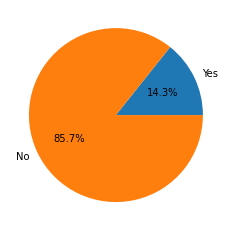

In [ ]:
#pie chart to show what percent of restaurants offer table booking
data = [90160,541002]
label = ['Yes', 'No']
plt.pie(data, labels = label, autopct='%1.1f%%')
plt.show()

It looks like more than 80% of the restaurants do not offer table booking, which makes sense because oftentimes only more high end restaurants offer this.

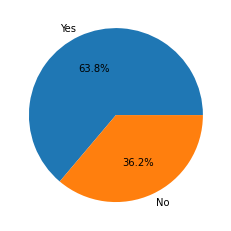

In [ ]:
# Show what percent of restaurants allow you to order online
data = [402836,228326]
label = ['Yes', 'No']
plt.pie(data, labels = label, autopct='%1.1f%%')
plt.show()

It seems that more than 60% do allow you to order online, while majority do offer online ordering, a large amount still do not. This is possibly due to these restaurants not being able to pay for the commissions or perhaps they value having their customers dine in.

In [ ]:
# Making new dataframes that are filtered to show which restaurants offer online ordering and which allow you to order online
df1 = df[df.online_order == 'Yes']
df2 = df[df.online_order == 'No']
df3 = df[df.book_table == 'Yes']
df4 = df[df.book_table == 'No']

<AxesSubplot:xlabel='rate', ylabel='Density'>

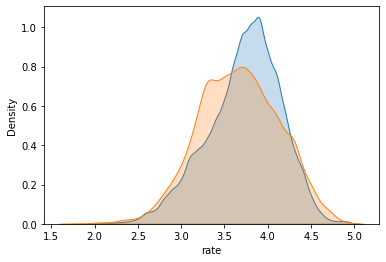

In [ ]:
# A plot comapring the rate distribution for restaurants that allow you to order online
sns.kdeplot(data=df1.rate, label = 'can order online', shade= True)
sns.kdeplot(data=df2.rate, label = 'cannot order online', shade= True)

It looks like restaurants that allow you to order online get higher average ratings. It looks like that customers value convenience.

<AxesSubplot:xlabel='cost_for_two', ylabel='Density'>

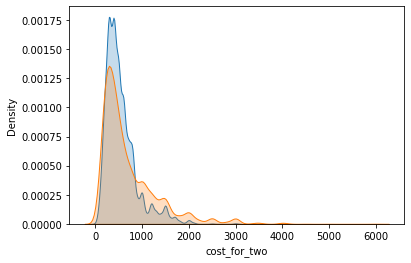

In [ ]:
sns.kdeplot(data=df1.cost_for_two, label = 'can order online', shade= True)
sns.kdeplot(data=df2.cost_for_two, label = 'cannot order online', shade= True)

Those that do not offer online ordering do have higher densitites at higher prices which supports my theory that some high end restaurants who prefer to have their customers dine in, though majority of the restaurants do have costs under 1000. 

<AxesSubplot:xlabel='rate', ylabel='Density'>

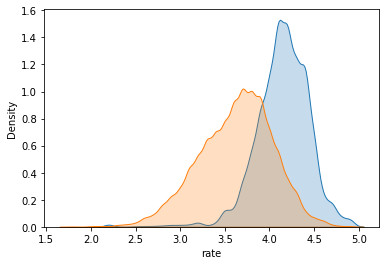

In [ ]:
# A plot comparing restaurants that offer table booking and those that don't
sns.kdeplot(data=df3.rate, label = 'can table book', shade= True)
sns.kdeplot(data=df4.rate, label = 'cannot table book', shade= True)

It looks like that restaurants that offer table booking have a higher average rating. This makes sense because these restaurants tend to be more high end and will have good food and customer service

<AxesSubplot:xlabel='cost_for_two', ylabel='Density'>

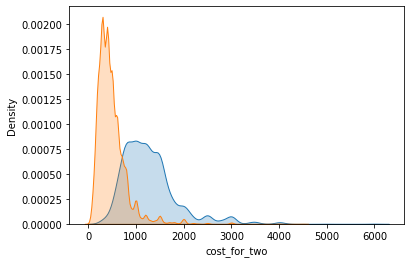

In [ ]:
# A plot comparing the price for restaurants who offer table booking and those that don't
sns.kdeplot(data=df3.cost_for_two, label = 'can table book', shade= True)
sns.kdeplot(data=df4.cost_for_two, label = 'cannot table book', shade= True)

As expected, the restaurants that offer table booking have higher costs than those that don't.

<AxesSubplot:xlabel='cost_for_two', ylabel='rate'>

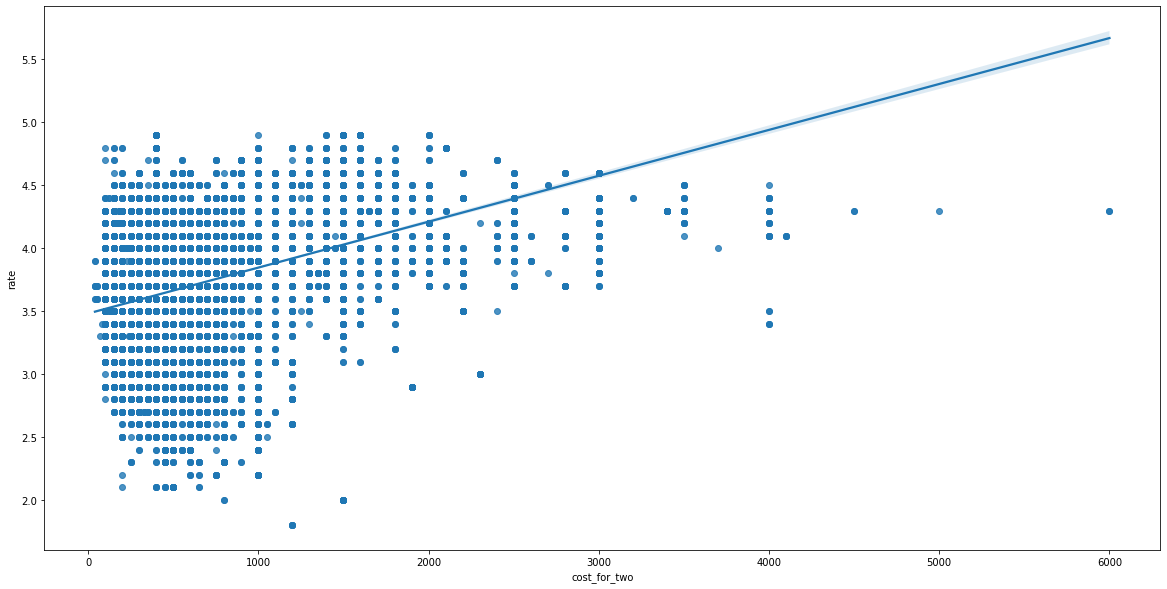

In [ ]:
# A scatter plot showing the relationship betwee price and rating
plt.figure(figsize=(20,10))
sns.regplot(y=df.rate, x=df.cost_for_two)

It looks like there is fairly strong correlation between cost and rate, which makes sense because those with higher cost will ensure that both the food and dining experience is good.

<AxesSubplot:xlabel='votes', ylabel='cost_for_two'>

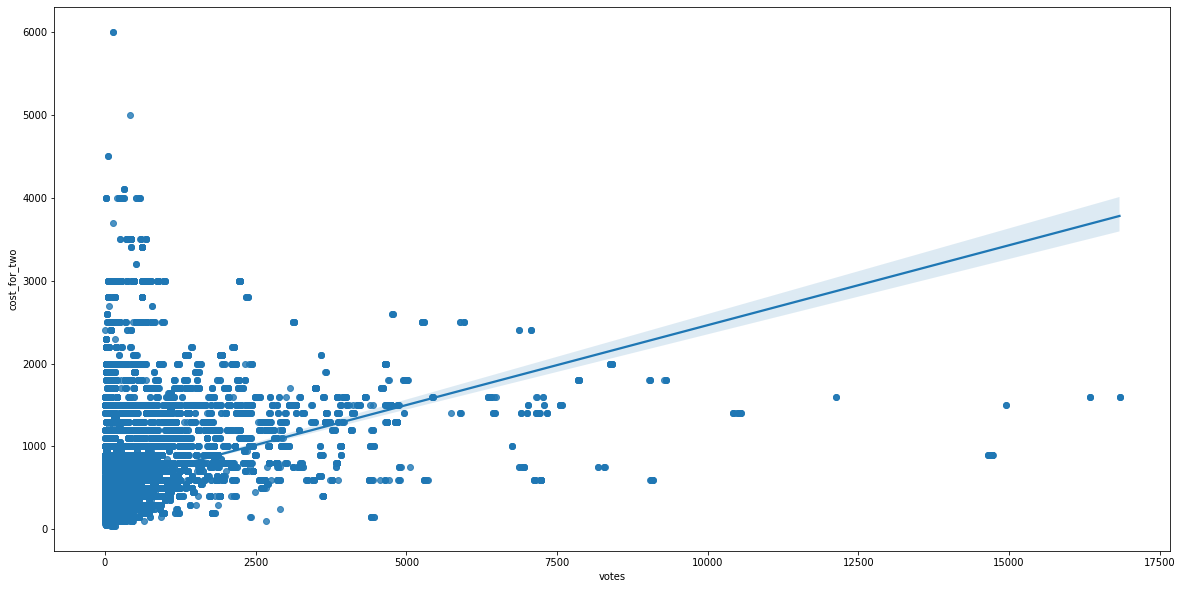

In [ ]:
# A scatter plot showing the relationship between cost and number of votes
plt.figure(figsize=(20,10))
sns.regplot(x=df.votes,y=df.cost_for_two)

We can see here that there is a high density of points that are both under 1000 cost and under 2500 votes. A reason for this is because there are more restaurants that hover around that price range. There is still a correlation between cost and votes but not quite as strong and we can even see that the variation is higher as seen in the wider blue area around the line. This means that there could be certain outliers present in the data.

<AxesSubplot:xlabel='cost_for_two', ylabel='Density'>

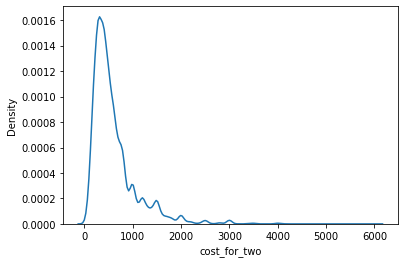

In [ ]:
# A plot showing the distribution for cost
sns.kdeplot(x = df.cost_for_two)

This distribution is skewed with most restaurants have costs less than 1000.

<AxesSubplot:xlabel='Count', ylabel='list_city'>

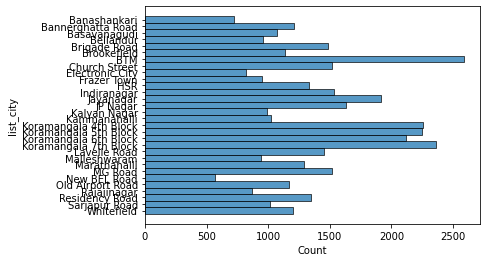

In [ ]:
# A plot showing the distribution of the listed cities
sns.histplot(y=df.list_city, )

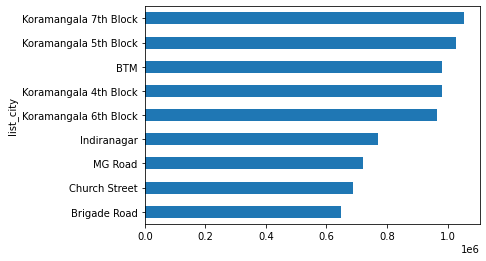

In [ ]:
# A graph showing the cities which received the most number of votes
city_votes = df.groupby('list_city').votes.sum().sort_values(ascending = False)[0:9]
city_votes.plot(kind='barh').invert_yaxis()
plt.show()

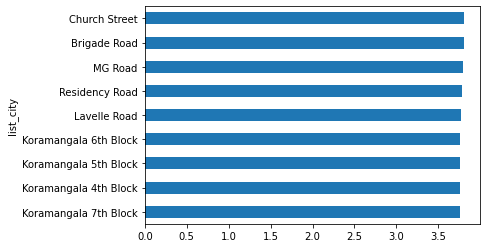

In [ ]:
# A graph showing the top 10 cities with the highest mean ratings
city_rate = df.groupby('list_city').rate.mean().sort_values(ascending = False)[0:9]
city_rate.plot(kind='barh').invert_yaxis()
plt.show()

It looks like the places with the highest average ratings also get the most votes. These cities seem to be home to some popular restaurants which increase the amount of votes and restaurants that get a lot of votes are most likely good places which lead to higher ratings.

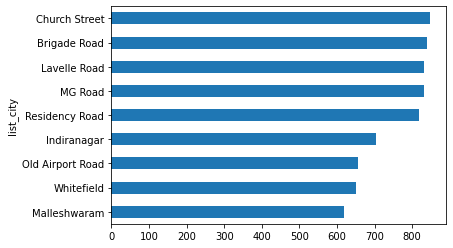

In [ ]:
# A graph showing the cities with the most expensive meals on average
city_cost = df.groupby('list_city').cost_for_two.mean().sort_values(ascending = False)[0:9]
city_cost.plot(kind='barh').invert_yaxis()
plt.show()

Some of the cities with the highest average cost are also some of the cities with the highest amount of votes and ratings. 

<AxesSubplot:xlabel='count', ylabel='name'>

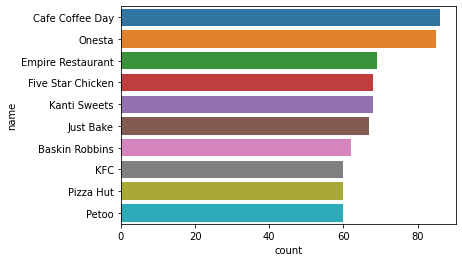

In [ ]:
# A plot showing which restaurants were the most popular
sns.countplot(y=df.name, order=df.name.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='rest_type'>

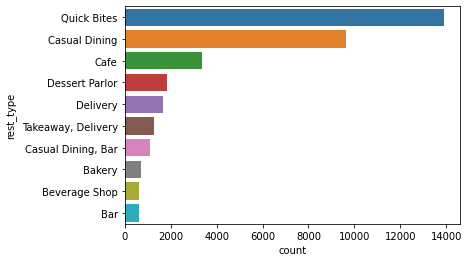

In [ ]:
# A plot showing which restaurant types were the most popular
sns.countplot(y=df.rest_type, order=df.rest_type.value_counts().iloc[:10].index)

With quick bites being the most popular, it seems that these people have busy lives and do not have too much time to just sit down and eat, which also makes online ordering and table booking more valuable.

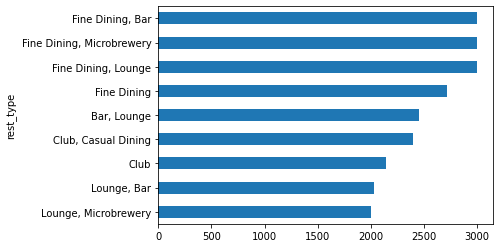

In [ ]:
# A graph showing the restaurant types with the highest cost on average
type_cost = df.groupby('rest_type').cost_for_two.mean().sort_values(ascending = False)[0:9]
type_cost.plot(kind='barh').invert_yaxis()
plt.show()

As one would expect, fine dining restaurants have the highest average costs

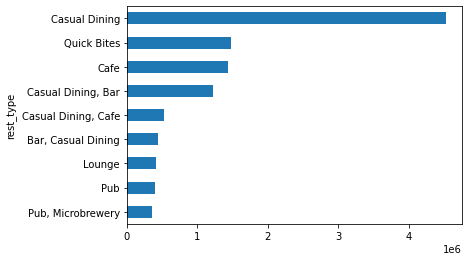

In [ ]:
# A graph showing which restaurant type got the most number of votes
type_votes = df.groupby('rest_type').votes.sum().sort_values(ascending = False)[0:9]
type_votes.plot(kind='barh').invert_yaxis()
plt.show()

It is interesting to see that despite quick bites having the most restaurants, casual dining actually gets the most votes. It looks like casual dining is the favored restaurant type.

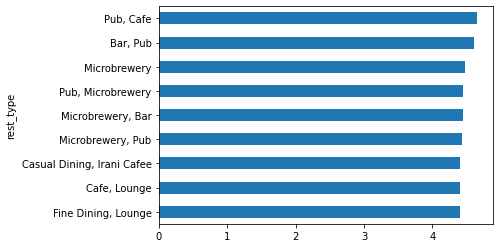

In [ ]:
# A graph showing which restaurant type had the highest average rating
type_rate = df.groupby('rest_type').rate.mean().sort_values(ascending = False)[0:9]
type_rate.plot(kind='barh').invert_yaxis()
plt.show()

<AxesSubplot:xlabel='count', ylabel='cuisines'>

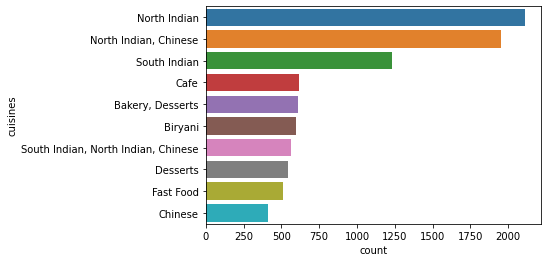

In [ ]:
# A plot showing which cusines were the most popular
sns.countplot(y=df.cuisines, order=df.cuisines.value_counts().iloc[:10].index)

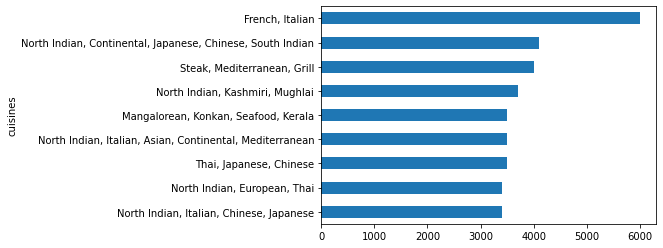

In [ ]:
# A graph showing which cuisines were the most expensive
cuisines_cost = df.groupby('cuisines').cost_for_two.mean().sort_values(ascending = False)[0:9]
cuisines_cost.plot(kind='barh').invert_yaxis()
plt.show()

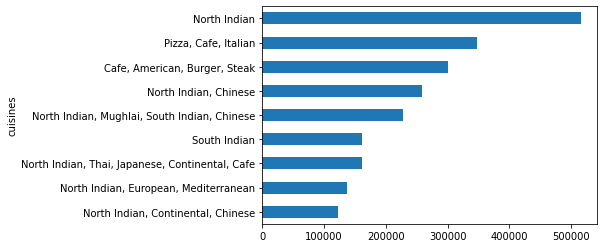

In [ ]:
# A graph showing which cuisines received the most number of votes
cuisines_votes = df.groupby('cuisines').votes.sum().sort_values(ascending = False)[0:9]
cuisines_votes.plot(kind='barh').invert_yaxis()
plt.show()

North Indian is quite popular so it would make sense that they would get a lot of votes. Casual dining and quick bites are also the most popular restaurant types so it also makes sense that the cuisines that are popular also match that description of being fast and easy to eat.

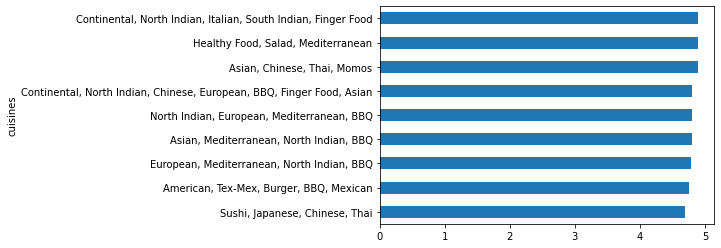

In [ ]:
# A graph showing which cuisines had the highest average rating
cuisines_rate = df.groupby('cuisines').rate.mean().sort_values(ascending = False)[0:9]
cuisines_rate.plot(kind='barh').invert_yaxis()
plt.show()

Looking at the graphs earlier, it looks like those with variety in their cuisine and restaurant type seem to have higher ratings. To help the model better capture this I decided to create new features that show the number of cuisines and restaurant types each restaurant offers.

# Feature Engineering

In [ ]:
# This creates a new column that contains the values of the cuisines column but in list form
df['list_cuisines'] = df['cuisines'].str.split(',')

# This creates a new column that contains the values of the rest_type column but in list form
df['list_rest_type'] = df['rest_type'].str.split(',')

In [ ]:
# This creates a new column that shows the number of restaurant types a restaurant offers, which I got by getting the length of the list of rest_type
df['type_variety'] = df.list_rest_type.str.len()

# This creates a new column that shows the number of cuisines a restaurant offers, which I got by getting the length of the list of cuisines
df['cuisine_variety'] = df.list_cuisines.str.len()

These ar all the features that I wanted to create so now we can begin to create the model. This starts with the target. I want to find out if a restaurant is good or not so to do this I will make another feature which will show a 1 if the rate is higher than 3.5 and 0 if it is less than 3.5. I chose 3.5 because in the plot which showed the distribution of the rate, 3.5 had a high frequency and seemed like a good middle ground.

In [ ]:
#target creation
df['isgood'] = df.rate.apply(lambda x: 1 if x>=3.5 else 0)

With the target created we can now begin to pick out the features we want our model to test for and assign the target.

In [ ]:
# Creating a new dataframe with these select features
x = df[['online_order','book_table','location','rest_type','cuisines','cost_for_two','list_type','list_city','type_variety','cuisine_variety']]
y = df['isgood']

### Data Encoding
Now that I have selected the features I want to test out, I will now encode the categorical values

In [ ]:
# Store a variable that contains the columns with an object datatype
object_cols = [cols for cols in x.columns if x[cols].dtype == 'object']

In [ ]:
# used to see which categorical columns have high amounts of unique values
object_nunique = list(map(lambda col: x[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda y: y[1])


[('online_order', 2),
 ('book_table', 2),
 ('list_type', 7),
 ('list_city', 30),
 ('rest_type', 87),
 ('location', 92),
 ('cuisines', 2367)]

It looks like only online order, book table, and list type have low cardinality, so we can use one hot encoding for this. The rest have high cardinality and will make the dataset very large so I will be using frequency encoding for these instead.

In [ ]:
#one hot encoding for those with low cardinality
x = pd.get_dummies(x, columns = ['online_order','book_table','list_type'])

#frequency encoding for those with high cardinality
x_count = x.list_city.value_counts().to_dict()
x.list_city = x.list_city.map(x_count)

x_count1 = x.rest_type.value_counts().to_dict()
x.rest_type = x.rest_type.map(x_count1)

x_count2 = x.location.value_counts().to_dict()
x.location = x.location.map(x_count2)

x_count3 = x.cuisines.value_counts().to_dict()
x.cuisines = x.cuisines.map(x_count3)

# Training
Everything is now setup so we can begin testing our models. I will be using and comparing three models namely: Random forest, Decision tree, and XGBoost.

In [ ]:
# Split the dataset into train and test sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Identify the model
model = RandomForestClassifier(n_estimators=200, random_state = 0)

# Fit the model
model.fit(x_train, y_train)

# Get the prediction and compare accuracy
y_pred = model.predict(x_val)
acc = accuracy_score(y_pred, y_val)
acc

0.8676812718107794

In [ ]:
# Identify the model
model = DecisionTreeClassifier(random_state = 0)

# Fit the model
model.fit(x_train, y_train)

# Get the prediction and compare accuracy
y_pred = model.predict(x_val)
acc = accuracy_score(y_pred, y_val)
acc

0.8870686312524234

In [ ]:
# Identify the model
model = XGBClassifier(learning_rate = 0.05, random_state=0)

# Fit the model
model.fit(x_train, y_train)

# Get the prediction and compare accuracy
y_pred = model.predict(x_val)
acc = accuracy_score(y_pred, y_val)
acc

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:04:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.764540519581233

In [ ]:
# Here I am just making a dataset of relevant data for further analysis
df.drop(axis=1, columns=['url','address','reviews_list'], inplace = True)

In [ ]:
df.to_csv('/kaggle/working/df.csv')